In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
col_names = ["user_id","item_id","rating","timestamp"]

In [4]:
# Importing a data frame of MovieLens Data Set

df = pd.read_csv("u.data", sep="\t", names=col_names)

In [6]:
df.head()

# User Id: Is Individual User ID
# Item Id: Individual Movie Id
# Rating: Rating Provided By The USer for Particular Movie
# Timestamp: is What time User given Rating for the Particular movie

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
# Importing a Movie Title Data Frame

movie_title =  pd.read_csv("Movie_Id_Titles")

In [8]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
# Merging the 2 Data Frame on the basis of Item Id

ratings = pd.merge(df, movie_title, on="item_id")

In [11]:
ratings.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [16]:
# Movies with Highest Rating

ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

<b> In the above Result we are unsure of How Many user has given the Ratings.

In [17]:
# Movies With most numbers of Ratings

ratings.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [20]:
# Creating the Data Frame of Mean Ratings and No of User rated for the particular movie

ratings2 = pd.DataFrame(ratings.groupby('title')['rating'].mean())
ratings2['No. Of Rating'] =  pd.DataFrame(ratings.groupby('title')['rating'].count())
ratings2.head()


,rating,No. Of Rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:xlabel='No. Of Rating', ylabel='Count'>

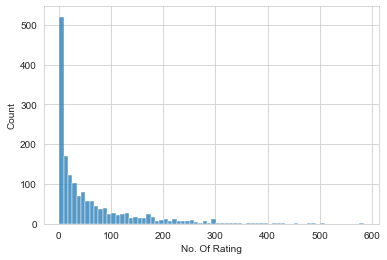

In [23]:
# Ploting No. of Ratings

sns.histplot(ratings2['No. Of Rating'], bins=70)

<AxesSubplot:xlabel='rating', ylabel='Count'>

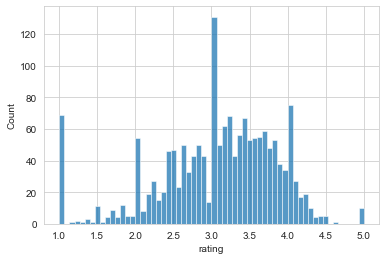

In [25]:
# Ploting Ratings

sns.histplot(ratings2['rating'], bins=60)

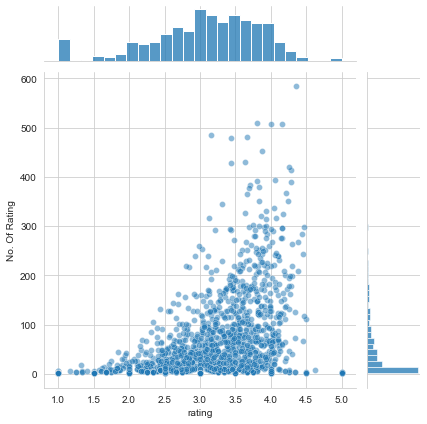

In [26]:
# Plotting a Relation Between Average Rating and No. of Rating

sns.jointplot(data=ratings2, x='rating', y='No. Of Rating', alpha=0.5)

In [29]:
# Create matrix containing User Id on one Axis and Movie Titles on another Axis

movie_mat = ratings.pivot_table(index='user_id', columns="title", values="rating")

In [30]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Top 10 Movie with no. of user ratings

ratings2.sort_values('No. Of Rating', ascending=False).head(10)

,rating,No. Of Rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [36]:
# Grabbing a User Rating for the Particular Movie

# 1. Star Wars (1977)
starWars_user_rating = movie_mat["Star Wars (1977)"]

# 2 Liar Liar (1997).
LiarLiar_user_rating = movie_mat["Liar Liar (1997)"]

In [37]:
starWars_user_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [38]:
LiarLiar_user_rating

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [41]:
# Exploring the Correlation Of Star Wars User Rating With The Other Movies

similar_to_starwars = movie_mat.corrwith(starWars_user_rating)
similar_to_liarliar = movie_mat.corrwith(LiarLiar_user_rating)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [45]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Correlation"])
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=["Correlation"])
print(corr_starwars.head(10))
print(corr_liarliar.head(10))

                                             Correlation
title                                                   
'Til There Was You (1997)                       0.872872
1-900 (1994)                                   -0.645497
101 Dalmatians (1996)                           0.211132
12 Angry Men (1957)                             0.184289
187 (1997)                                      0.027398
2 Days in the Valley (1996)                     0.066654
20,000 Leagues Under the Sea (1954)             0.289768
2001: A Space Odyssey (1968)                    0.230884
3 Ninjas: High Noon At Mega Mountain (1998)          NaN
39 Steps, The (1935)                            0.106453
                                             Correlation
title                                                   
'Til There Was You (1997)                       0.118913
1-900 (1994)                                         NaN
101 Dalmatians (1996)                           0.469765
12 Angry Men (1957)            

In [46]:
corr_starwars.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


<font color = blue> <b> This type of Correlation can be seen because the less no of user rated these movies and likey the only one user has rated these movies who has also rated Star Wars

In [47]:
# Joining The No. of Rating along with Each Movie correaltion

corr_starwars = corr_starwars.join(ratings2["No. Of Rating"])

In [57]:
# Now We will See the Top 10 Correlations

corr_starwars[corr_starwars["No. Of Rating"]>100].sort_values("Correlation", ascending=False).head(10)

,Correlation,No. Of Rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [56]:
# Now We We Will Explore Liar Liar which Is Comedy Movie

#corr_liarliar = corr_liarliar.join(ratings2["No. Of Rating"])
corr_liarliar[corr_liarliar["No. Of Rating"]>100].sort_values("Correlation", ascending=False).head(10)

,Correlation,No. Of Rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


In [53]:
# Drooping the Null Valuse

corr_liarliar.dropna(inplace=True)
corr_starwars.dropna(inplace=True)

## <font color = Red> Advance Recommander Systed

### <font color = green> Memory Base Collabortive Filtering
    
Memory-Based Collaborative Filtering approaches can be divided into two main sections: user-item filtering and item-item filtering.

A user-item filtering will take a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked.

In contrast, item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations.

- Item-Item Collaborative Filtering: “Users who liked this item also liked …”
- User-Item Collaborative Filtering: “Users who are similar to you also liked …”
    
n both cases, you create a user-item matrix which built from the entire dataset.

Since we have split the data into testing and training we will need to create two [943 x 1682] matrices (all users by all movies).

The training matrix contains 75% of the ratings and the testing matrix contains 25% of the ratings.
    
After you have built the user-item matrix you calculate the similarity and create a similarity matrix.

- The similarity values between items in Item-Item Collaborative Filtering are measured by observing all the users who have rated both items.

- For User-Item Collaborative Filtering the similarity values between users are measured by observing all the items that are rated by both users.

A distance metric commonly used in recommender systems is *cosine similarity*, where the ratings are seen as vectors in ``n``-dimensional space and the similarity is calculated based on the angle between these vectors. 
Cosine similiarity for users *a* and *m* can be calculated using the formula below, where you take dot product of  the user vector *$u_k$* and the user vector *$u_a$* and divide it by multiplication of the Euclidean lengths of the vectors.
<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(u_k,u_a)=\frac{u_k&space;\cdot&space;u_a&space;}{&space;\left&space;\|&space;u_k&space;\right&space;\|&space;\left&space;\|&space;u_a&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{k,m}x_{a,m}}{\sqrt{\sum&space;x_{k,m}^2\sum&space;x_{a,m}^2}}"/>

To calculate similarity between items *m* and *b* you use the formula:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(i_m,i_b)=\frac{i_m&space;\cdot&space;i_b&space;}{&space;\left&space;\|&space;i_m&space;\right&space;\|&space;\left&space;\|&space;i_b&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{a,m}x_{a,b}}{\sqrt{\sum&space;x_{a,m}^2\sum&space;x_{a,b}^2}}
"/>


In [58]:
# Required Data Frame

ratings.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [59]:
# No. Of Unique Users And Movies

n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


#### <font color = blue> Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train, test = train_test_split(ratings, test_size=0.25)

In [64]:
len(train)

75002

In [65]:
len(test)

25001

In [79]:
train.itertuples

<bound method DataFrame.itertuples of        user_id  item_id  rating  timestamp                          title
35799      346      520       5  874948105       Great Escape, The (1963)
76643      187     1119       3  879465683  Some Kind of Wonderful (1987)
40531      561      410       1  885810117                 Kingpin (1996)
9779       417      196       5  879647090      Dead Poets Society (1989)
32856      909      339       4  891919406                Mad City (1997)
...        ...      ...     ...        ...                            ...
84843      918      971       4  891987780            Mediterraneo (1991)
61222      523      509       4  883700870            My Left Foot (1989)
83713      222      441       2  881059920  Amityville Horror, The (1979)
40         154       50       5  879138657               Star Wars (1977)
22367      227       14       4  879035463             Postino, Il (1994)

[75002 rows x 5 columns]>

In [86]:
count = 0
for line in train.itertuples():
    #print(line[2])
    count += 1
print(count)

75002


In [108]:
#Create two user-item matrices, one for training and another for testing
train_matrix = np.zeros((n_users, n_items))
for line in train.itertuples():
    train_matrix[line[1]-1, line[2]-1] = line[3]  

test_matrix = np.zeros((n_users, n_items))
for line in test.itertuples():
    test_matrix[line[1]-1, line[2]-1] = line[3]

In [109]:
train_matrix.shape

(944, 1682)

#### <font color = blue> Calculatin the Cosine  Similarity.
<b> We can use the pairwise_distances function from sklearn to calculate the cosine similarity. Note, the output will range from 0 to 1 since the ratings are all positive.

In [110]:
from sklearn.metrics.pairwise import pairwise_distances


In [111]:
# Caculating User-User Cosine Similarity
user_similarity = pairwise_distances(train_matrix, metric='cosine')

In [112]:
# Calculating Item-Item Cosine Similarity

item_similarity = pairwise_distances(train_matrix.T, metric='cosine')

In [113]:
user_similarity.shape

(944, 944)

#### <font color = blue> Making the prediction

Next step is to make predictions. You have already created similarity matrices: `user_similarity` and `item_similarity` and therefore you can make a prediction by applying following formula for user-based CF:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\bar{x}_{k}&space;&plus;&space;\frac{\sum\limits_{u_a}&space;sim_u(u_k,&space;u_a)&space;(x_{a,m}&space;-&space;\bar{x_{u_a}})}{\sum\limits_{u_a}|sim_u(u_k,&space;u_a)|}"/>

You can look at the similarity between users *k* and *a* as weights that are multiplied by the ratings of a similar user *a* (corrected for the average rating of that user). You will need to normalize it so that the ratings stay between 1 and 5 and, as a final step, sum the average ratings for the user that you are trying to predict. 

The idea here is that some users may tend always to give high or low ratings to all movies. The relative difference in the ratings that these users give is more important than the absolute values. To give an example: suppose, user *k* gives 4 stars to his favourite movies and 3 stars to all other good movies. Suppose now that another user *t* rates movies that he/she likes with 5 stars, and the movies he/she fell asleep over with 3 stars. These two users could have a very similar taste but treat the rating system differently. 

When making a prediction for item-based CF you don't need to correct for users average rating since query user itself is used to do predictions.

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\frac{\sum\limits_{i_b}&space;sim_i(i_m,&space;i_b)&space;(x_{k,b})&space;}{\sum\limits_{i_b}|sim_i(i_m,&space;i_b)|}"/>

In [114]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [115]:
item_prediction = predict(train_matrix, item_similarity, type='item')
user_prediction = predict(train_matrix, user_similarity, type='user')

#### <font color = blue> Evaluation

There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is *Root Mean Squared Error (RMSE)*. 
<img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

You can use the [mean_square_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE) function from `sklearn`, where the RMSE is just the square root of MSE. To read more about different evaluation metrics you can take a look at [this article](http://research.microsoft.com/pubs/115396/EvaluationMetrics.TR.pdf). 
    
Since you only want to consider predicted ratings that are in the test dataset, you filter out all other elements in the prediction matrix with `prediction[ground_truth.nonzero()]`. 

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [118]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_matrix)))

User-based CF RMSE: 3.135692745776174
Item-based CF RMSE: 3.4622320718078736


<font color = blue> <b> Memory-based algorithms are easy to implement and produce reasonable prediction quality. 
The drawback of memory-based CF is that it doesn't scale to real-world scenarios and doesn't address the well-known cold-start problem, that is when new user or new item enters the system. Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models, but also suffer when new users or items that don't have any ratings enter the system. 

### <font color = green>  Model-based Collaborative Filtering

Model-based Collaborative Filtering is based on **matrix factorization (MF)** which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF. The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items. 
When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization you can restructure the  user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector. You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.


In [119]:
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


To give an example of the learned latent preferences of the users and items: let's say for the MovieLens dataset you have the following information: _(user id, age, location, gender, movie id, director, actor, language, year, rating)_. By applying matrix factorization the model learns that important user features are _age group (under 10, 10-18, 18-30, 30-90)_, _location_ and _gender_, and for movie features it learns that _decade_, _director_ and _actor_ are most important. Now if you look into the information you have stored, there is no such feature as the _decade_, but the model can learn on its own. The important aspect is that the CF model only uses data (user_id, movie_id, rating) to learn the latent features. If there is little data available model-based CF model will predict poorly, since it will be more difficult to learn the latent features. 

Models that use both ratings and content features are called **Hybrid Recommender Systems** where both Collaborative Filtering and Content-based Models are combined. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based Models on their own: they are capable to address the cold-start problem better since if you don't have any ratings for a user or an item you could use the metadata from the user or item to make a prediction. 

In [121]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_matrix)))

User-based CF MSE: 2.719719804119107


In [123]:
X_pred

array([[ 2.91902258e+00,  1.53415981e+00,  1.09762140e+00, ...,
        -2.55146398e-03,  0.00000000e+00,  6.51777101e-02],
       [ 1.45599928e+00, -1.28887223e-01,  1.28548682e-01, ...,
         4.23505016e-03,  0.00000000e+00, -1.56436498e-02],
       [ 8.58046046e-02, -1.48095052e-02,  1.48516374e-01, ...,
         2.01990883e-02,  0.00000000e+00, -8.50657621e-04],
       ...,
       [ 6.39623632e-01,  1.57450229e-01, -3.14463938e-01, ...,
         2.04017866e-02,  0.00000000e+00, -4.72606230e-02],
       [ 5.58040056e-01,  1.38737745e+00,  7.91875105e-01, ...,
        -6.58120445e-03,  0.00000000e+00,  4.66941850e-02],
       [ 1.37808138e-01, -1.89860451e-03, -1.16123097e-03, ...,
         3.38642394e-04,  0.00000000e+00, -2.72068985e-04]])